<a href="https://colab.research.google.com/github/AyushPS0712/Lithology_Predictor/blob/main/lithology_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
import  matplotlib.pyplot  as plt

In [46]:
df = pd.read_csv("/content/Realtime_Drilling_F_15.csv")

In [47]:
df.head()

,Depth,LAGMWT,Time,EditFlag,TORQUE,MOTOR_RPM,STRATESUM,MWOUT,LAGMWDIFF,MWIN,BIT_RPM,DXC,MUDRETDEPTH,PUMP,LAGMTEMP,RigActivityCode,MRIN,FLOWOUT,ROP_AVG,LAGMRES,TOTGAS,MROUT,MTIN,LAGMRDIFF,FLOWIN,WOB,ONBOTTOM_TIME,ECDBIT,MTOUT,BIT_DIST,SURF_RPM,LAGMTDIFF,LITH
0,3300.0,1280.0000,2013-11-28 12:54:29,0.0,3768.1461,0.0,0.300773,1280.0000,0.000000,1280.0000,0.267094,0.987674,3299.0000,3112134.6,0.0,111.0,0.0,0.016037,0.005075,0.0,0.000108,0.0,0.0,0.0,0.006662,-19762.743,194.0,1293.6605,0.0,0.995211,0.267094,0.0,claystone
1,3305.0,1280.0000,2013-11-28 16:48:21,0.0,20991.5430,0.0,1.674558,1306.2254,26.225434,1306.2254,1.314148,0.987674,3301.7245,17932214.0,0.0,111.0,0.0,0.038981,0.004088,0.0,0.000183,0.0,0.0,0.0,0.037091,26217.864,1617.0,1360.8740,0.0,5.995622,1.314720,0.0,marl
2,3310.0,1315.2258,2013-11-28 17:01:59,0.0,22610.3830,0.0,1.766764,1320.0146,4.788793,1320.0146,1.328706,0.987674,3301.7245,20878002.0,0.0,111.0,0.0,0.041079,0.005159,0.0,0.000176,0.0,0.0,0.0,0.039134,83492.293,2435.0,1382.0713,0.0,10.997926,1.328674,0.0,marl
3,3315.0,1320.0008,2013-11-28 17:46:39,0.0,24296.9810,0.0,1.768285,1320.0000,-0.000815,1320.0000,1.420887,0.987674,3302.8926,20728354.0,0.0,111.0,0.0,0.041359,0.005971,0.0,0.000188,0.0,0.0,0.0,0.039168,97087.882,3442.0,1381.7741,0.0,15.997564,1.420116,0.0,claystone
4,3320.0,1320.0000,2013-11-28 18:02:50,0.0,24931.3130,0.0,1.783305,1320.0000,-0.000002,1320.0000,1.595948,0.987674,3306.1559,20553813.0,0.0,111.0,0.0,0.043607,0.005419,0.0,0.000276,0.0,0.0,0.0,0.039500,54793.206,4333.0,1381.5933,0.0,20.990649,1.593931,0.0,claystone


In [48]:
df.tail()

,Depth,LAGMWT,Time,EditFlag,TORQUE,MOTOR_RPM,STRATESUM,MWOUT,LAGMWDIFF,MWIN,BIT_RPM,DXC,MUDRETDEPTH,PUMP,LAGMTEMP,RigActivityCode,MRIN,FLOWOUT,ROP_AVG,LAGMRES,TOTGAS,MROUT,MTIN,LAGMRDIFF,FLOWIN,WOB,ONBOTTOM_TIME,ECDBIT,MTOUT,BIT_DIST,SURF_RPM,LAGMTDIFF,LITH
265,4625.0,1320.0,2013-12-01 08:24:10,0.0,26576.987,0.0,1.812104,1320.0,0.0,1320.0,2.997543,0.987674,4610.5484,23973914.0,303.15,111.0,0.0,0.042061,0.007227,0.0,0.002806,0.0,303.15,0.0,0.040138,66100.695,179121.0,1451.0333,0.0,1325.9919,2.997209,-303.15,sandstone
266,4630.0,1320.0,2013-12-01 08:34:57,0.0,26286.342,0.0,1.803403,1320.0,0.0,1320.0,2.996923,0.987674,4614.8470,23910387.0,303.15,111.0,0.0,0.041470,0.008293,0.0,0.002645,0.0,303.15,0.0,0.039945,42336.899,179767.0,1450.7293,0.0,1330.9950,2.997208,-303.15,sandstone
267,4635.0,1320.0,2013-12-01 08:44:35,0.0,25788.760,0.0,1.808020,1320.0,0.0,1320.0,2.998220,0.987674,4618.6288,24824892.0,303.15,111.0,0.0,0.041916,0.008656,0.0,0.002929,0.0,303.15,0.0,0.040048,53454.245,180345.0,1451.0906,0.0,1335.9951,2.998743,-303.15,sandstone
268,4640.0,1320.0,2013-12-01 09:03:24,0.0,26380.035,0.0,1.816485,1320.0,0.0,1320.0,2.968932,0.987674,4619.6430,24885096.0,303.15,111.0,0.0,0.041342,0.007875,0.0,0.002917,0.0,303.15,0.0,0.040235,55877.437,180934.0,1451.6456,0.0,1340.9541,2.967951,-303.15,sandstone
269,4645.0,1320.0,2013-12-01 09:13:05,0.0,26845.068,0.0,1.799988,1320.0,0.0,1320.0,2.663709,0.987674,4622.7851,24469116.0,303.15,111.0,0.0,0.040801,0.008395,0.0,0.002194,0.0,303.15,0.0,0.039870,60337.383,181514.0,1450.9532,0.0,1345.9923,2.663811,-303.15,sandstone


In [49]:
df.count()

Depth              270
LAGMWT             270
Time               270
EditFlag           270
TORQUE             270
MOTOR_RPM          270
STRATESUM          270
MWOUT              270
LAGMWDIFF          270
MWIN               270
BIT_RPM            270
DXC                270
MUDRETDEPTH        270
PUMP               270
LAGMTEMP           270
RigActivityCode    270
MRIN               270
FLOWOUT            270
ROP_AVG            270
LAGMRES            270
TOTGAS             270
MROUT              270
MTIN               270
LAGMRDIFF          270
FLOWIN             270
WOB                270
ONBOTTOM_TIME      270
ECDBIT             270
MTOUT              270
BIT_DIST           270
SURF_RPM           270
LAGMTDIFF          270
LITH               270
dtype: int64

In [50]:
df.columns

Index(['Depth', 'LAGMWT', 'Time', 'EditFlag', 'TORQUE', 'MOTOR_RPM',
       'STRATESUM', 'MWOUT', 'LAGMWDIFF', 'MWIN', 'BIT_RPM', 'DXC',
       'MUDRETDEPTH', 'PUMP', 'LAGMTEMP', 'RigActivityCode', 'MRIN', 'FLOWOUT',
       'ROP_AVG', 'LAGMRES', 'TOTGAS', 'MROUT', 'MTIN', 'LAGMRDIFF', 'FLOWIN',
       'WOB', 'ONBOTTOM_TIME', 'ECDBIT', 'MTOUT', 'BIT_DIST', 'SURF_RPM',
       'LAGMTDIFF', 'LITH'],
      dtype='object')

In [51]:
#dropping time colums as we dont need it for our model
df= df.drop(['Time'],axis=1)

<Axes: >

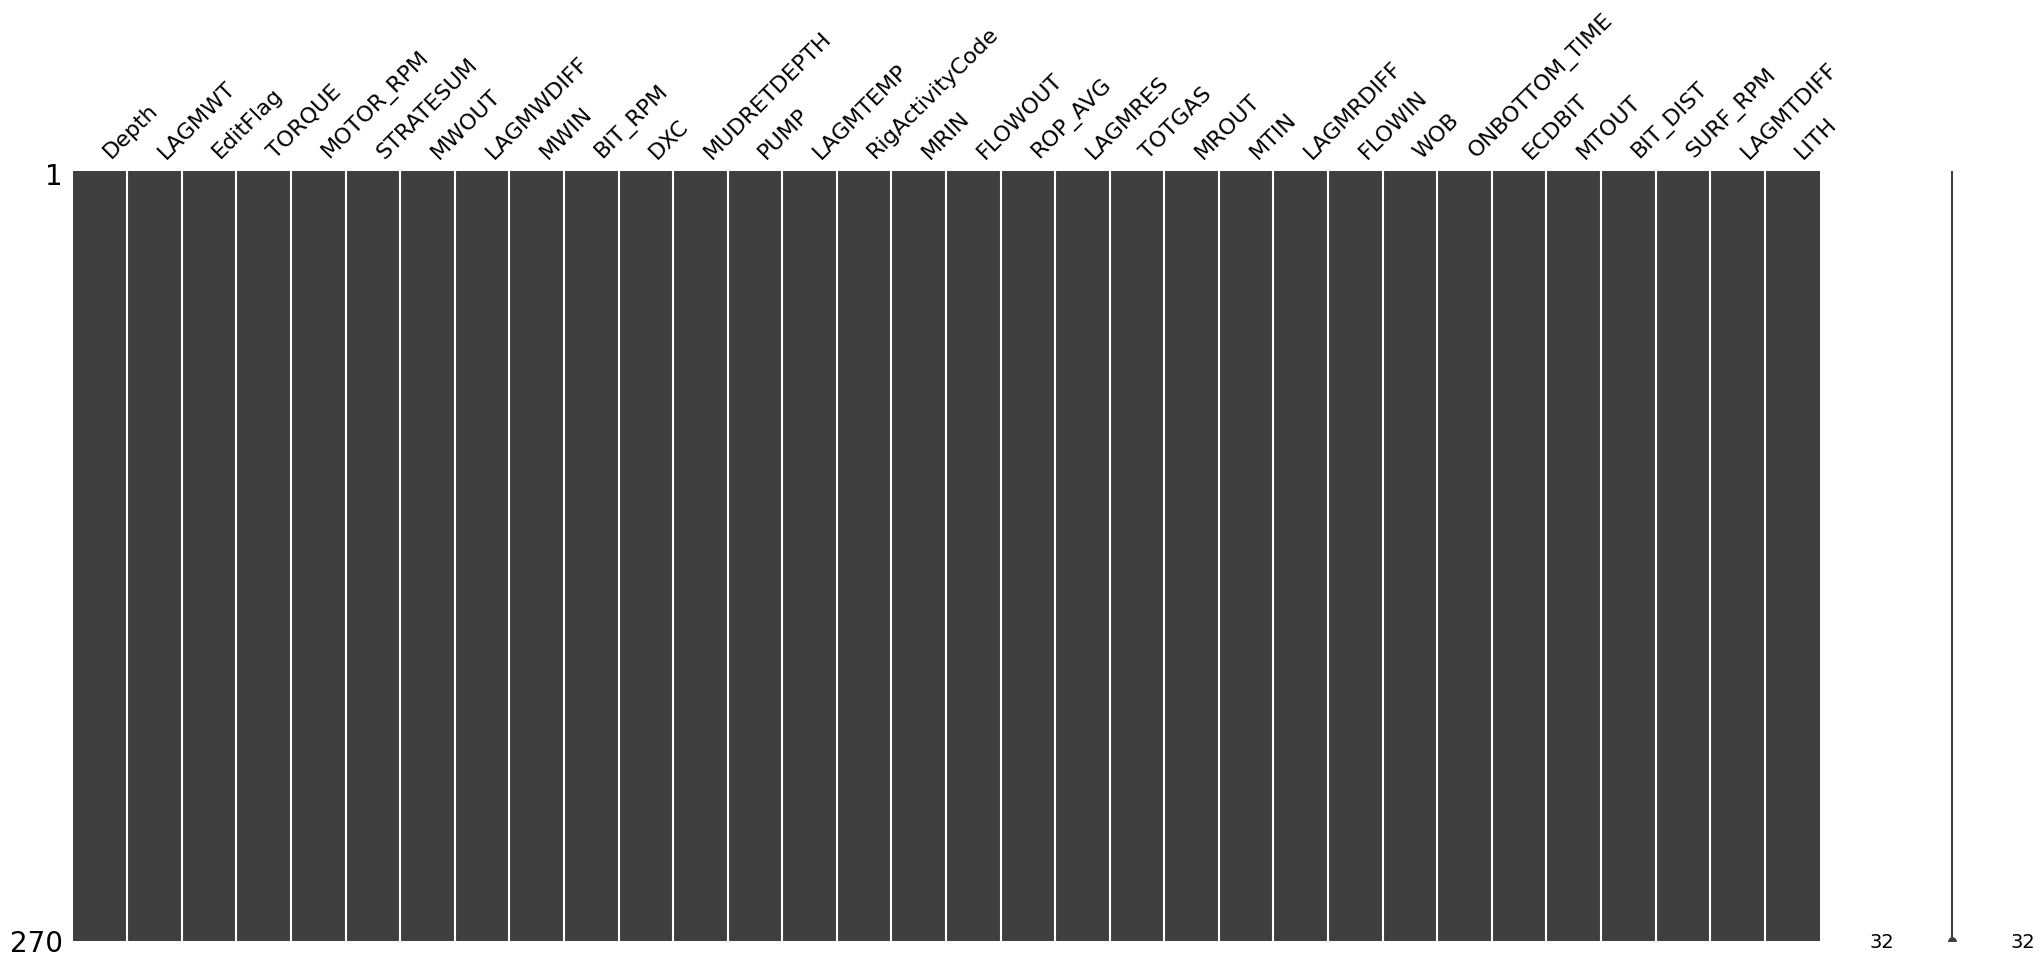

In [52]:
#checking missing values in data
import missingno as msno
msno.matrix(df)

In [53]:
df.LITH.value_counts()

sandstone    219
marl          30
claystone     17
dolomite       3
limestone      1
Name: LITH, dtype: int64

Text(0.5, 1.0, 'Lithology')

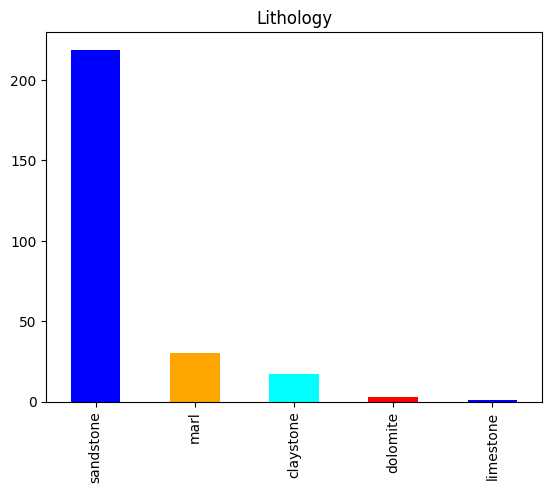

In [54]:
#as dolomite and limestone are very less compared to other lithology counts so we
#decide to drop them
df.LITH.value_counts().plot(kind='bar', color=['blue','orange','aqua','red'])
plt.title('Lithology')

In [55]:
df=df[(df.LITH !='dolomite') & (df.LITH !='limestone')]
df.head()

,Depth,LAGMWT,EditFlag,TORQUE,MOTOR_RPM,STRATESUM,MWOUT,LAGMWDIFF,MWIN,BIT_RPM,DXC,MUDRETDEPTH,PUMP,LAGMTEMP,RigActivityCode,MRIN,FLOWOUT,ROP_AVG,LAGMRES,TOTGAS,MROUT,MTIN,LAGMRDIFF,FLOWIN,WOB,ONBOTTOM_TIME,ECDBIT,MTOUT,BIT_DIST,SURF_RPM,LAGMTDIFF,LITH
0,3300.0,1280.0000,0.0,3768.1461,0.0,0.300773,1280.0000,0.000000,1280.0000,0.267094,0.987674,3299.0000,3112134.6,0.0,111.0,0.0,0.016037,0.005075,0.0,0.000108,0.0,0.0,0.0,0.006662,-19762.743,194.0,1293.6605,0.0,0.995211,0.267094,0.0,claystone
1,3305.0,1280.0000,0.0,20991.5430,0.0,1.674558,1306.2254,26.225434,1306.2254,1.314148,0.987674,3301.7245,17932214.0,0.0,111.0,0.0,0.038981,0.004088,0.0,0.000183,0.0,0.0,0.0,0.037091,26217.864,1617.0,1360.8740,0.0,5.995622,1.314720,0.0,marl
2,3310.0,1315.2258,0.0,22610.3830,0.0,1.766764,1320.0146,4.788793,1320.0146,1.328706,0.987674,3301.7245,20878002.0,0.0,111.0,0.0,0.041079,0.005159,0.0,0.000176,0.0,0.0,0.0,0.039134,83492.293,2435.0,1382.0713,0.0,10.997926,1.328674,0.0,marl
3,3315.0,1320.0008,0.0,24296.9810,0.0,1.768285,1320.0000,-0.000815,1320.0000,1.420887,0.987674,3302.8926,20728354.0,0.0,111.0,0.0,0.041359,0.005971,0.0,0.000188,0.0,0.0,0.0,0.039168,97087.882,3442.0,1381.7741,0.0,15.997564,1.420116,0.0,claystone
4,3320.0,1320.0000,0.0,24931.3130,0.0,1.783305,1320.0000,-0.000002,1320.0000,1.595948,0.987674,3306.1559,20553813.0,0.0,111.0,0.0,0.043607,0.005419,0.0,0.000276,0.0,0.0,0.0,0.039500,54793.206,4333.0,1381.5933,0.0,20.990649,1.593931,0.0,claystone


In [56]:
df.count()

Depth              266
LAGMWT             266
EditFlag           266
TORQUE             266
MOTOR_RPM          266
STRATESUM          266
MWOUT              266
LAGMWDIFF          266
MWIN               266
BIT_RPM            266
DXC                266
MUDRETDEPTH        266
PUMP               266
LAGMTEMP           266
RigActivityCode    266
MRIN               266
FLOWOUT            266
ROP_AVG            266
LAGMRES            266
TOTGAS             266
MROUT              266
MTIN               266
LAGMRDIFF          266
FLOWIN             266
WOB                266
ONBOTTOM_TIME      266
ECDBIT             266
MTOUT              266
BIT_DIST           266
SURF_RPM           266
LAGMTDIFF          266
LITH               266
dtype: int64

# Finding Erroneous Features

In [57]:
df.describe()

,Depth,LAGMWT,EditFlag,TORQUE,MOTOR_RPM,STRATESUM,MWOUT,LAGMWDIFF,MWIN,BIT_RPM,DXC,MUDRETDEPTH,PUMP,LAGMTEMP,RigActivityCode,MRIN,FLOWOUT,ROP_AVG,LAGMRES,TOTGAS,MROUT,MTIN,LAGMRDIFF,FLOWIN,WOB,ONBOTTOM_TIME,ECDBIT,MTOUT,BIT_DIST,SURF_RPM,LAGMTDIFF
count,266.000000,266.000000,266.0,266.000000,266.0,266.000000,266.000000,266.000000,266.000000,266.000000,2.660000e+02,266.000000,2.660000e+02,266.000000,266.0,266.0,266.000000,266.000000,266.0,266.000000,266.0,266.000000,266.0,266.000000,2.660000e+02,266.000000,266.000000,266.0,266.000000,266.000000,266.000000
mean,3977.631579,1319.681303,0.0,23252.763853,0.0,1.771667,1319.797895,0.116592,1319.797895,2.259363,9.876741e-01,3958.437628,2.176950e+07,286.157987,111.0,0.0,0.040395,0.007867,0.0,0.013517,0.0,289.996326,0.0,0.039242,5.746018e+04,94687.759398,1426.459935,0.0,678.803872,2.261777,-286.157987
std,389.585207,3.472684,0.0,3103.327062,0.0,0.168429,2.590895,1.633482,2.590895,0.413233,2.224632e-16,388.374785,2.611370e+06,69.647782,0.0,0.0,0.002931,0.001331,0.0,0.009674,0.0,61.178029,0.0,0.003731,1.223188e+05,50116.164534,24.781933,0.0,389.451385,0.401418,69.647782
min,3300.000000,1280.000000,0.0,993.720810,0.0,0.009412,1280.000000,-0.000815,1280.000000,0.010555,9.876740e-01,3299.000000,1.396055e+06,0.000000,111.0,0.0,0.013956,0.002652,0.0,0.000108,0.0,0.000000,0.0,0.000208,-4.300360e+04,194.000000,1293.660500,0.0,0.995211,0.267094,-303.150000
25%,3646.250000,1320.000000,0.0,22053.335250,0.0,1.783333,1320.000000,0.000000,1320.000000,1.999417,9.876740e-01,3623.970050,2.093404e+07,303.150000,111.0,0.0,0.039895,0.007392,0.0,0.004739,0.0,303.150000,0.0,0.039501,3.703277e+04,55484.750000,1422.706250,0.0,347.241180,1.999537,-303.150000
50%,3977.500000,1320.000000,0.0,23320.760000,0.0,1.799999,1320.000000,0.000000,1320.000000,2.068660,9.876740e-01,3966.002700,2.185455e+07,303.150000,111.0,0.0,0.040358,0.008163,0.0,0.013176,0.0,303.150000,0.0,0.039870,4.562943e+04,96200.000000,1434.752000,0.0,678.496170,2.068851,-303.150000
75%,4313.750000,1320.000000,0.0,25198.227250,0.0,1.800000,1320.000000,0.000000,1320.000000,2.663961,9.876740e-01,4293.959125,2.321287e+07,303.150000,111.0,0.0,0.041323,0.008713,0.0,0.021548,0.0,303.150000,0.0,0.039870,5.507690e+04,136784.000000,1443.089275,0.0,1014.744300,2.663939,-303.150000
max,4645.000000,1320.000800,0.0,31208.191000,0.0,1.816672,1320.014600,26.225434,1320.014600,3.000916,9.876740e-01,4622.785100,2.547392e+07,303.150000,111.0,0.0,0.044405,0.010447,0.0,0.036226,0.0,303.150120,0.0,0.040239,1.857840e+06,181514.000000,1451.645600,0.0,1345.992300,3.000691,0.000000


In [58]:
pd.set_option('display.max_columns',None)
df.head()

,Depth,LAGMWT,EditFlag,TORQUE,MOTOR_RPM,STRATESUM,MWOUT,LAGMWDIFF,MWIN,BIT_RPM,DXC,MUDRETDEPTH,PUMP,LAGMTEMP,RigActivityCode,MRIN,FLOWOUT,ROP_AVG,LAGMRES,TOTGAS,MROUT,MTIN,LAGMRDIFF,FLOWIN,WOB,ONBOTTOM_TIME,ECDBIT,MTOUT,BIT_DIST,SURF_RPM,LAGMTDIFF,LITH
0,3300.0,1280.0000,0.0,3768.1461,0.0,0.300773,1280.0000,0.000000,1280.0000,0.267094,0.987674,3299.0000,3112134.6,0.0,111.0,0.0,0.016037,0.005075,0.0,0.000108,0.0,0.0,0.0,0.006662,-19762.743,194.0,1293.6605,0.0,0.995211,0.267094,0.0,claystone
1,3305.0,1280.0000,0.0,20991.5430,0.0,1.674558,1306.2254,26.225434,1306.2254,1.314148,0.987674,3301.7245,17932214.0,0.0,111.0,0.0,0.038981,0.004088,0.0,0.000183,0.0,0.0,0.0,0.037091,26217.864,1617.0,1360.8740,0.0,5.995622,1.314720,0.0,marl
2,3310.0,1315.2258,0.0,22610.3830,0.0,1.766764,1320.0146,4.788793,1320.0146,1.328706,0.987674,3301.7245,20878002.0,0.0,111.0,0.0,0.041079,0.005159,0.0,0.000176,0.0,0.0,0.0,0.039134,83492.293,2435.0,1382.0713,0.0,10.997926,1.328674,0.0,marl
3,3315.0,1320.0008,0.0,24296.9810,0.0,1.768285,1320.0000,-0.000815,1320.0000,1.420887,0.987674,3302.8926,20728354.0,0.0,111.0,0.0,0.041359,0.005971,0.0,0.000188,0.0,0.0,0.0,0.039168,97087.882,3442.0,1381.7741,0.0,15.997564,1.420116,0.0,claystone
4,3320.0,1320.0000,0.0,24931.3130,0.0,1.783305,1320.0000,-0.000002,1320.0000,1.595948,0.987674,3306.1559,20553813.0,0.0,111.0,0.0,0.043607,0.005419,0.0,0.000276,0.0,0.0,0.0,0.039500,54793.206,4333.0,1381.5933,0.0,20.990649,1.593931,0.0,claystone


In [59]:
df.describe()

,Depth,LAGMWT,EditFlag,TORQUE,MOTOR_RPM,STRATESUM,MWOUT,LAGMWDIFF,MWIN,BIT_RPM,DXC,MUDRETDEPTH,PUMP,LAGMTEMP,RigActivityCode,MRIN,FLOWOUT,ROP_AVG,LAGMRES,TOTGAS,MROUT,MTIN,LAGMRDIFF,FLOWIN,WOB,ONBOTTOM_TIME,ECDBIT,MTOUT,BIT_DIST,SURF_RPM,LAGMTDIFF
count,266.000000,266.000000,266.0,266.000000,266.0,266.000000,266.000000,266.000000,266.000000,266.000000,2.660000e+02,266.000000,2.660000e+02,266.000000,266.0,266.0,266.000000,266.000000,266.0,266.000000,266.0,266.000000,266.0,266.000000,2.660000e+02,266.000000,266.000000,266.0,266.000000,266.000000,266.000000
mean,3977.631579,1319.681303,0.0,23252.763853,0.0,1.771667,1319.797895,0.116592,1319.797895,2.259363,9.876741e-01,3958.437628,2.176950e+07,286.157987,111.0,0.0,0.040395,0.007867,0.0,0.013517,0.0,289.996326,0.0,0.039242,5.746018e+04,94687.759398,1426.459935,0.0,678.803872,2.261777,-286.157987
std,389.585207,3.472684,0.0,3103.327062,0.0,0.168429,2.590895,1.633482,2.590895,0.413233,2.224632e-16,388.374785,2.611370e+06,69.647782,0.0,0.0,0.002931,0.001331,0.0,0.009674,0.0,61.178029,0.0,0.003731,1.223188e+05,50116.164534,24.781933,0.0,389.451385,0.401418,69.647782
min,3300.000000,1280.000000,0.0,993.720810,0.0,0.009412,1280.000000,-0.000815,1280.000000,0.010555,9.876740e-01,3299.000000,1.396055e+06,0.000000,111.0,0.0,0.013956,0.002652,0.0,0.000108,0.0,0.000000,0.0,0.000208,-4.300360e+04,194.000000,1293.660500,0.0,0.995211,0.267094,-303.150000
25%,3646.250000,1320.000000,0.0,22053.335250,0.0,1.783333,1320.000000,0.000000,1320.000000,1.999417,9.876740e-01,3623.970050,2.093404e+07,303.150000,111.0,0.0,0.039895,0.007392,0.0,0.004739,0.0,303.150000,0.0,0.039501,3.703277e+04,55484.750000,1422.706250,0.0,347.241180,1.999537,-303.150000
50%,3977.500000,1320.000000,0.0,23320.760000,0.0,1.799999,1320.000000,0.000000,1320.000000,2.068660,9.876740e-01,3966.002700,2.185455e+07,303.150000,111.0,0.0,0.040358,0.008163,0.0,0.013176,0.0,303.150000,0.0,0.039870,4.562943e+04,96200.000000,1434.752000,0.0,678.496170,2.068851,-303.150000
75%,4313.750000,1320.000000,0.0,25198.227250,0.0,1.800000,1320.000000,0.000000,1320.000000,2.663961,9.876740e-01,4293.959125,2.321287e+07,303.150000,111.0,0.0,0.041323,0.008713,0.0,0.021548,0.0,303.150000,0.0,0.039870,5.507690e+04,136784.000000,1443.089275,0.0,1014.744300,2.663939,-303.150000
max,4645.000000,1320.000800,0.0,31208.191000,0.0,1.816672,1320.014600,26.225434,1320.014600,3.000916,9.876740e-01,4622.785100,2.547392e+07,303.150000,111.0,0.0,0.044405,0.010447,0.0,0.036226,0.0,303.150120,0.0,0.040239,1.857840e+06,181514.000000,1451.645600,0.0,1345.992300,3.000691,0.000000


In [60]:
#calculating  zeros in each feature
for col in df.columns:
  sum_zeros=(df[col]==0).sum()
  pct_zero=sum_zeros/len(df)*100
  print(f'{col}:{pct_zero:.0f}%')

Depth:0%
LAGMWT:0%
EditFlag:100%
TORQUE:0%
MOTOR_RPM:100%
STRATESUM:0%
MWOUT:0%
LAGMWDIFF:81%
MWIN:0%
BIT_RPM:0%
DXC:0%
MUDRETDEPTH:0%
PUMP:0%
LAGMTEMP:5%
RigActivityCode:0%
MRIN:100%
FLOWOUT:0%
ROP_AVG:0%
LAGMRES:100%
TOTGAS:0%
MROUT:100%
MTIN:4%
LAGMRDIFF:100%
FLOWIN:0%
WOB:0%
ONBOTTOM_TIME:0%
ECDBIT:0%
MTOUT:100%
BIT_DIST:0%
SURF_RPM:0%
LAGMTDIFF:5%
LITH:0%


<Axes: xlabel='LAGMWDIFF', ylabel='Count'>

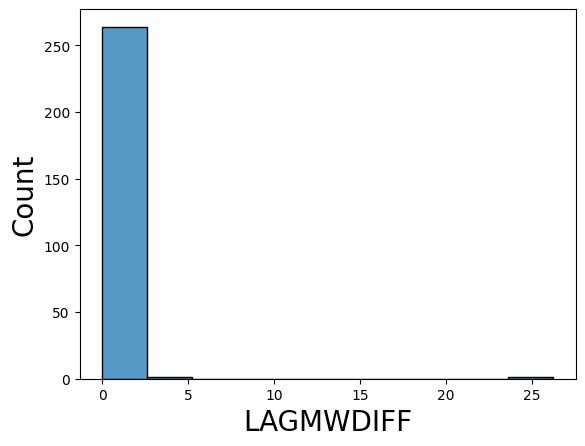

In [61]:
sns.histplot(x=df['LAGMWDIFF'],y=None)

<Axes: xlabel='WOB', ylabel='Depth'>

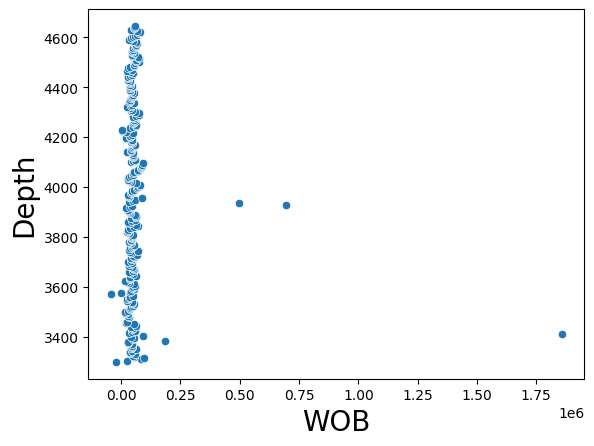

In [62]:
sns.scatterplot(x=df['WOB'],y=df['Depth'])

 **By analysis of the data I have found out about following erroneous fetaures:**
 # Erroneous Features
* MTOUT, LAGMRDIFF,MROUT,LAGMRES,MRIN,MOTOR_RPM,EditFlag all only have zeros
* DXC and RigActivityCode has same values respectively
* MWIN,LAGMTEMP,MTIN,MWOUT,LAGMTDIFF,LAMGWT  have almost same all percentile and maximun values
* LAGMWDIFF have 80% values as zero and remaining as outlier
* WOB have some negative value oullier and some positive large outlier which we have to pretreat

All these erroneous feature we  will remove from out data except WOB because we can Do outlier treatment in WOB


In [63]:
errors=['MTOUT', 'LAGMRDIFF','MROUT','LAGMRES','MRIN','MOTOR_RPM','EditFlag' ,'DXC', 'RigActivityCode', 'MWIN','LAGMTEMP','MTIN','MWOUT','LAGMTDIFF','LAGMWT','LAGMWDIFF']

In [64]:
df=df.drop(errors,axis=1)
df=df[(df.WOB<1e6) & (df.WOB>0)]
df.head()

,Depth,TORQUE,STRATESUM,BIT_RPM,MUDRETDEPTH,PUMP,FLOWOUT,ROP_AVG,TOTGAS,FLOWIN,WOB,ONBOTTOM_TIME,ECDBIT,BIT_DIST,SURF_RPM,LITH
1,3305.0,20991.543,1.674558,1.314148,3301.7245,17932214.0,0.038981,0.004088,0.000183,0.037091,26217.864,1617.0,1360.8740,5.995622,1.314720,marl
2,3310.0,22610.383,1.766764,1.328706,3301.7245,20878002.0,0.041079,0.005159,0.000176,0.039134,83492.293,2435.0,1382.0713,10.997926,1.328674,marl
3,3315.0,24296.981,1.768285,1.420887,3302.8926,20728354.0,0.041359,0.005971,0.000188,0.039168,97087.882,3442.0,1381.7741,15.997564,1.420116,claystone
4,3320.0,24931.313,1.783305,1.595948,3306.1559,20553813.0,0.043607,0.005419,0.000276,0.039500,54793.206,4333.0,1381.5933,20.990649,1.593931,claystone
5,3325.0,24330.264,1.783333,1.653237,3311.3763,20492430.0,0.043191,0.005435,0.000253,0.039501,50301.579,5255.0,1381.1635,25.996929,1.653262,marl


# EXPLORATORY DATA ANALYSIS


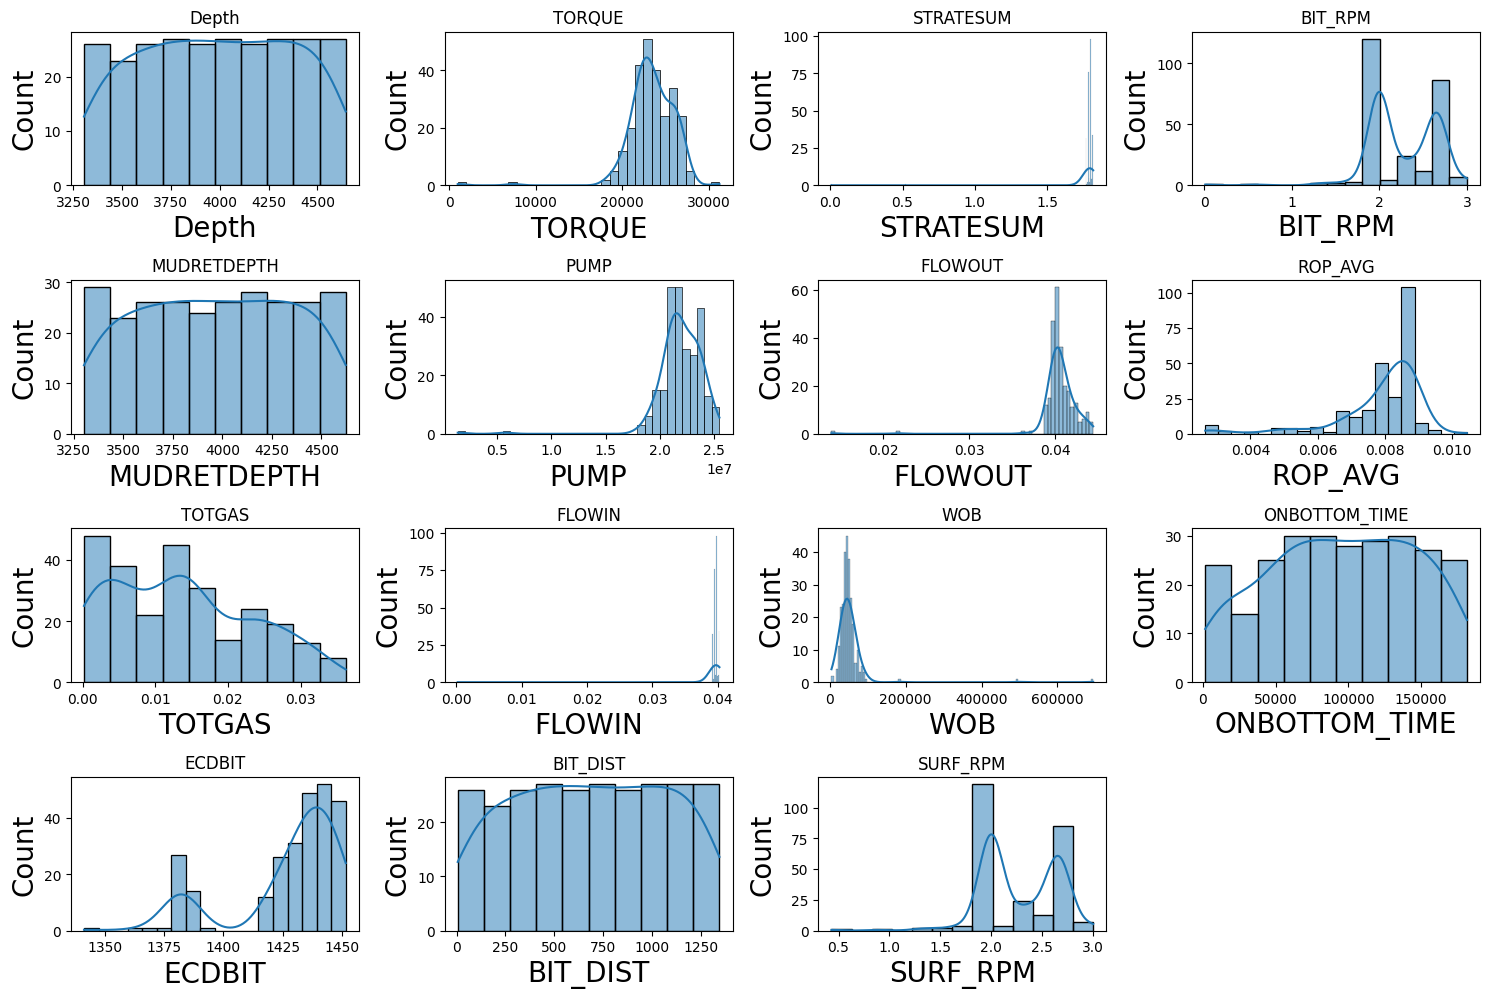

In [65]:
features = df.columns[:-1]
plt.figure(figsize=(15,12))
for i in range(len(features)):
  plt.subplot(5,4,i+1)
  sns.histplot(df[features[i]], kde=True)
  plt.title(features[i])

plt.tight_layout()



In [66]:
cor = df.corr()

<ipython-input-66-1f0d48ef3315>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


<Axes: >

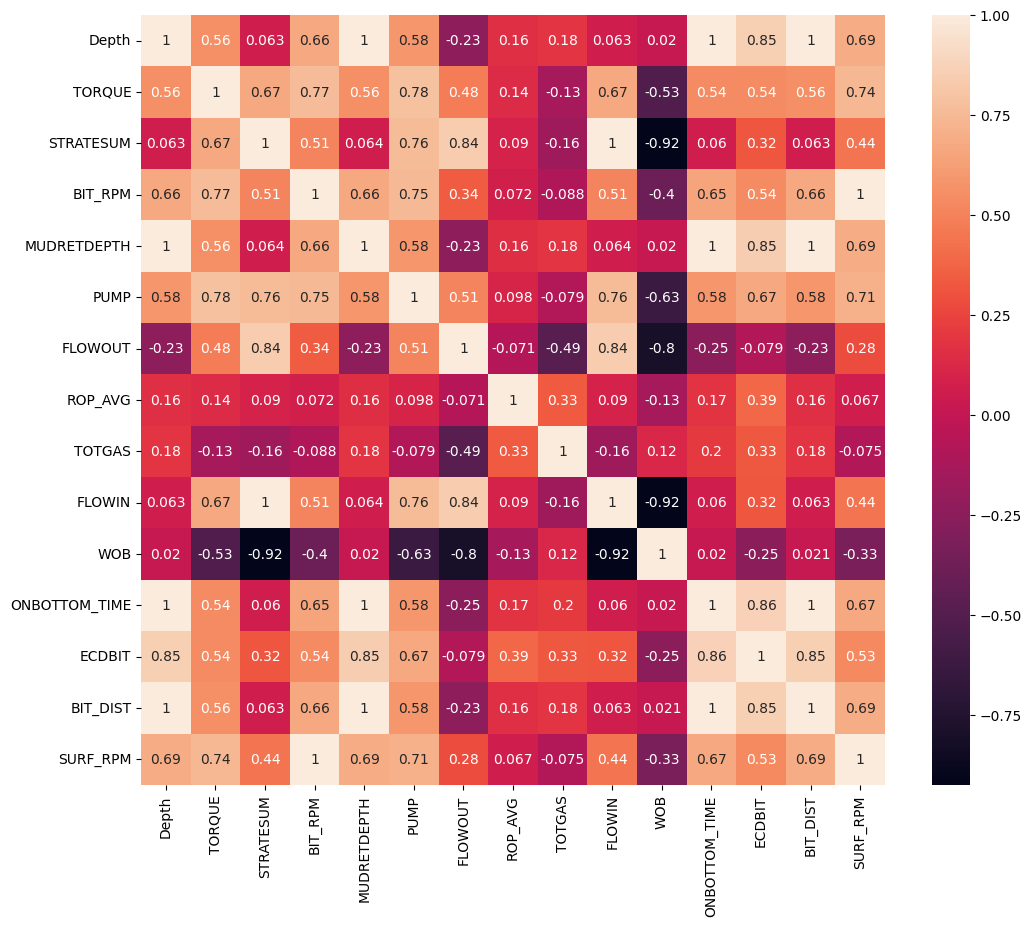

In [67]:
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True)

In [68]:
#removing correlated features to optimize data
corr_features=['MUDRETDEPTH','BIT_DIST','ONBOTTOM_TIME','SURF_RPM']
df=df.drop(corr_features,axis=1)
df.head()

,Depth,TORQUE,STRATESUM,BIT_RPM,PUMP,FLOWOUT,ROP_AVG,TOTGAS,FLOWIN,WOB,ECDBIT,LITH
1,3305.0,20991.543,1.674558,1.314148,17932214.0,0.038981,0.004088,0.000183,0.037091,26217.864,1360.8740,marl
2,3310.0,22610.383,1.766764,1.328706,20878002.0,0.041079,0.005159,0.000176,0.039134,83492.293,1382.0713,marl
3,3315.0,24296.981,1.768285,1.420887,20728354.0,0.041359,0.005971,0.000188,0.039168,97087.882,1381.7741,claystone
4,3320.0,24931.313,1.783305,1.595948,20553813.0,0.043607,0.005419,0.000276,0.039500,54793.206,1381.5933,claystone
5,3325.0,24330.264,1.783333,1.653237,20492430.0,0.043191,0.005435,0.000253,0.039501,50301.579,1381.1635,marl


In [69]:
#plotting pairplot
plt.rcParams["axes.labelsize"]=20
f = sns.pairplot(df,hue='LITH',corner=True)

(3700.0, 3305.0)

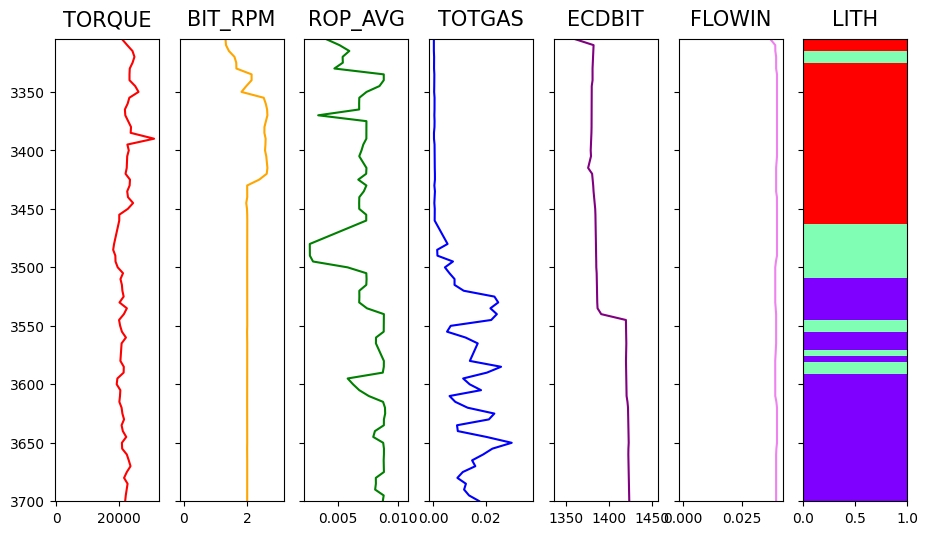

In [70]:
rows, cols = 1, 7
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(11,6), sharey=True)
features = ['TORQUE', 'BIT_RPM', 'ROP_AVG', 'TOTGAS', 'ECDBIT' , 'FLOWIN']
colors = ['red', 'orange', 'green', 'blue', 'purple' , 'violet']

# Encode lithology
lith = df.LITH.values
lith_code = []
for i in range(len(lith)):
  if lith[i]=='sandstone':
    code = 1
  if lith[i]=='claystone':
    code = 2
  if lith[i]=='marl':
    code = 3
  lith_code.append(code)
F = np.vstack((lith_code, lith_code)).T

for i in range(cols):
    if i < cols-1:
        ax[i].plot(df[features[i]], df.Depth, color=colors[i])
        ax[i].set_ylim(max(df.Depth), min(df.Depth))
        ax[i].set_title(features[i], size=15, pad=10)
    elif i==cols-1:
        ax[i].imshow(F, aspect='auto', extent=[0,1,max(df.Depth), min(df.Depth)], cmap='rainbow')
        ax[i].set_title('LITH', size=15, pad=10)

plt.ylim(ymin=3700)

In [74]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_validate, RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
# initializing X and y for feeding into our model
X, y = df.iloc[:,1:-1], df['LITH']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.30)
#oversampling
over = SMOTE(k_neighbors=4)

# creating model
model = AdaBoostClassifier()

#normalizing
norm = StandardScaler()

# making pipeline
steps = [('norm', norm), ('o', over), ('model', model)]
pipe = Pipeline(steps=steps)

scoring = ['accuracy', 'precision_macro', 'recall_macro']
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores_pipe = cross_validate(pipe, X_train, y_train,
                            scoring=scoring, cv=cv, n_jobs=-1)

# Oversampling  the test data
over = SMOTE(k_neighbors=4)
X_test, y_test = over.fit_resample(X_test, y_test)

In [75]:
#performance analysis
print('Mean Accuracy: %.5f' % np.mean(scores_pipe['test_accuracy']))
print('Mean Precision: %.5f' % np.mean(scores_pipe['test_precision_macro']))
print('Mean Recall: %.5f' % np.mean(scores_pipe['test_recall_macro']))

Mean Accuracy: 0.89337
Mean Precision: 0.81534
Mean Recall: 0.85079


In [ ]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [ ]:
plot_confusion_matrix(pipe, X_test, y_test)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

###I have trained my model with Ada boost classifier and performance results are shown above